# Iris species

Author: Nguyễn Nhật Minh
Student ID: N21DCCN053

## Importing data

Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


Loading data from `iris.csv` file into dataframe

In [2]:
df = pd.read_csv("iris.csv")

## Dataset walkthrough

1. Displaying the first 5 rows of the dataframe

In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


2. Getting information of the dataframe

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


3. Getting the shape of the dataframe

In [5]:
df_shape = df.shape
print(df_shape)
print(f"Row: {df_shape[0]}")
print(f"Column: {df_shape[1]}")

(150, 6)
Row: 150
Column: 6


4. Getting the columns of the dataframe

In [6]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


5. Getting the summary statistics of the numerical columns

In [7]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


6. Checking for missing values

In [8]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


7. Counting the number of unique values in the `Species` columns

In [9]:
print(df["Species"].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


8. Plotting the pairplot

In [10]:
print(df.value_counts)

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       I

## Data visualization

1. Using SCATTER PLOT

Axes(0.125,0.11;0.775x0.77)


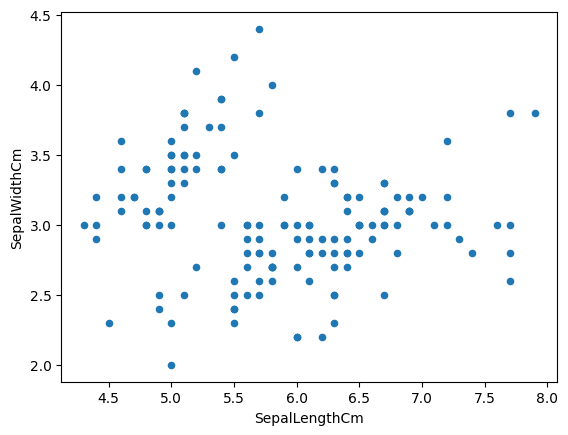

In [11]:
print(df.plot(kind="scatter", x="SepalLengthCm", y= "SepalWidthCm"))

2. Using JOIN PLOT

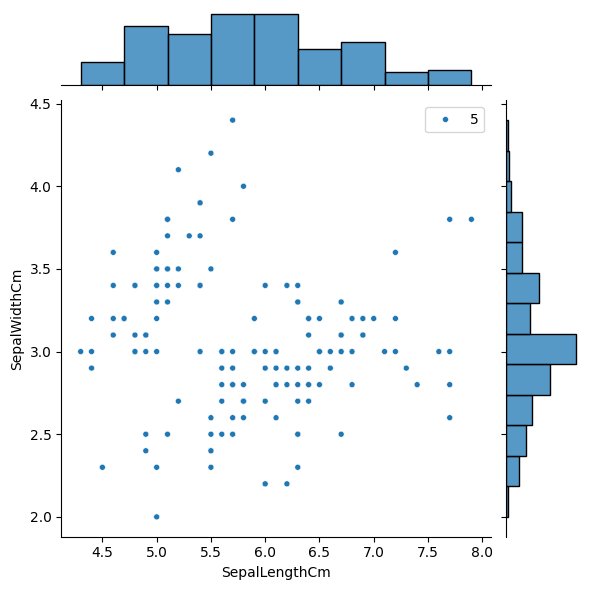

In [12]:
sns.jointplot( data=df,x="SepalLengthCm", y="SepalWidthCm", size=5)

3. Using DENSITY PLOT: KDE

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

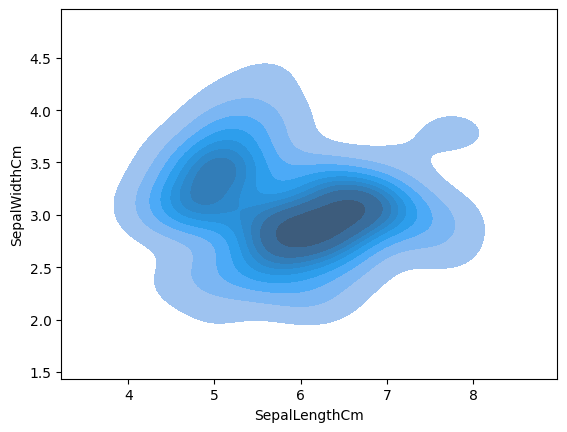

In [13]:
sns.kdeplot(data= df, x="SepalLengthCm", y="SepalWidthCm", fill=True)

4. Using FACET GRID

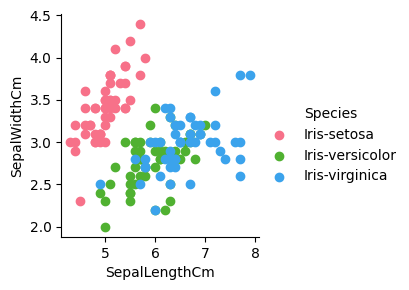

In [14]:
sns.FacetGrid(df, hue="Species", palette="husl").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

5. Using BOXPLOT

<Axes: ylabel='PetalLengthCm'>

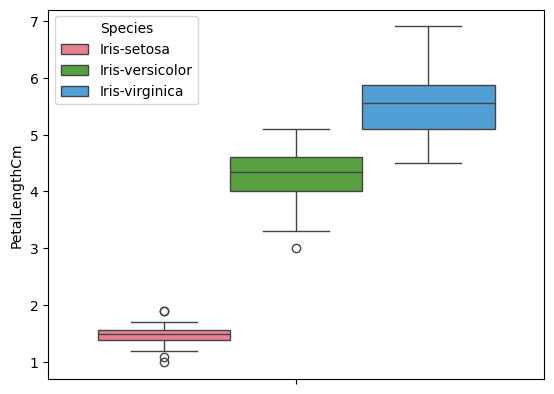

In [15]:
sns.boxplot(hue="Species", y="PetalLengthCm", data=df, palette="husl")

6. Using VIOLIN PLOT

<Axes: ylabel='PetalWidthCm'>

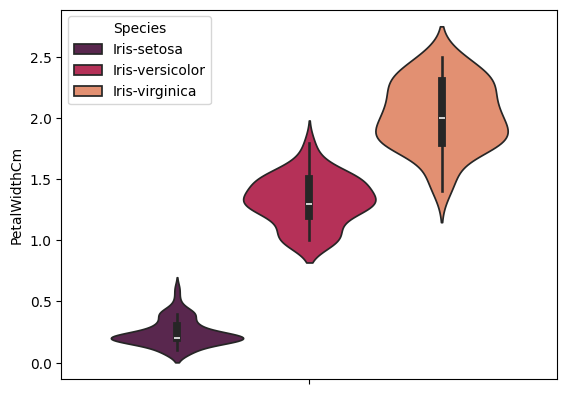

In [16]:
sns.violinplot(data=df, hue="Species", y="PetalWidthCm", palette="rocket")

7. Using PAIRPLOT

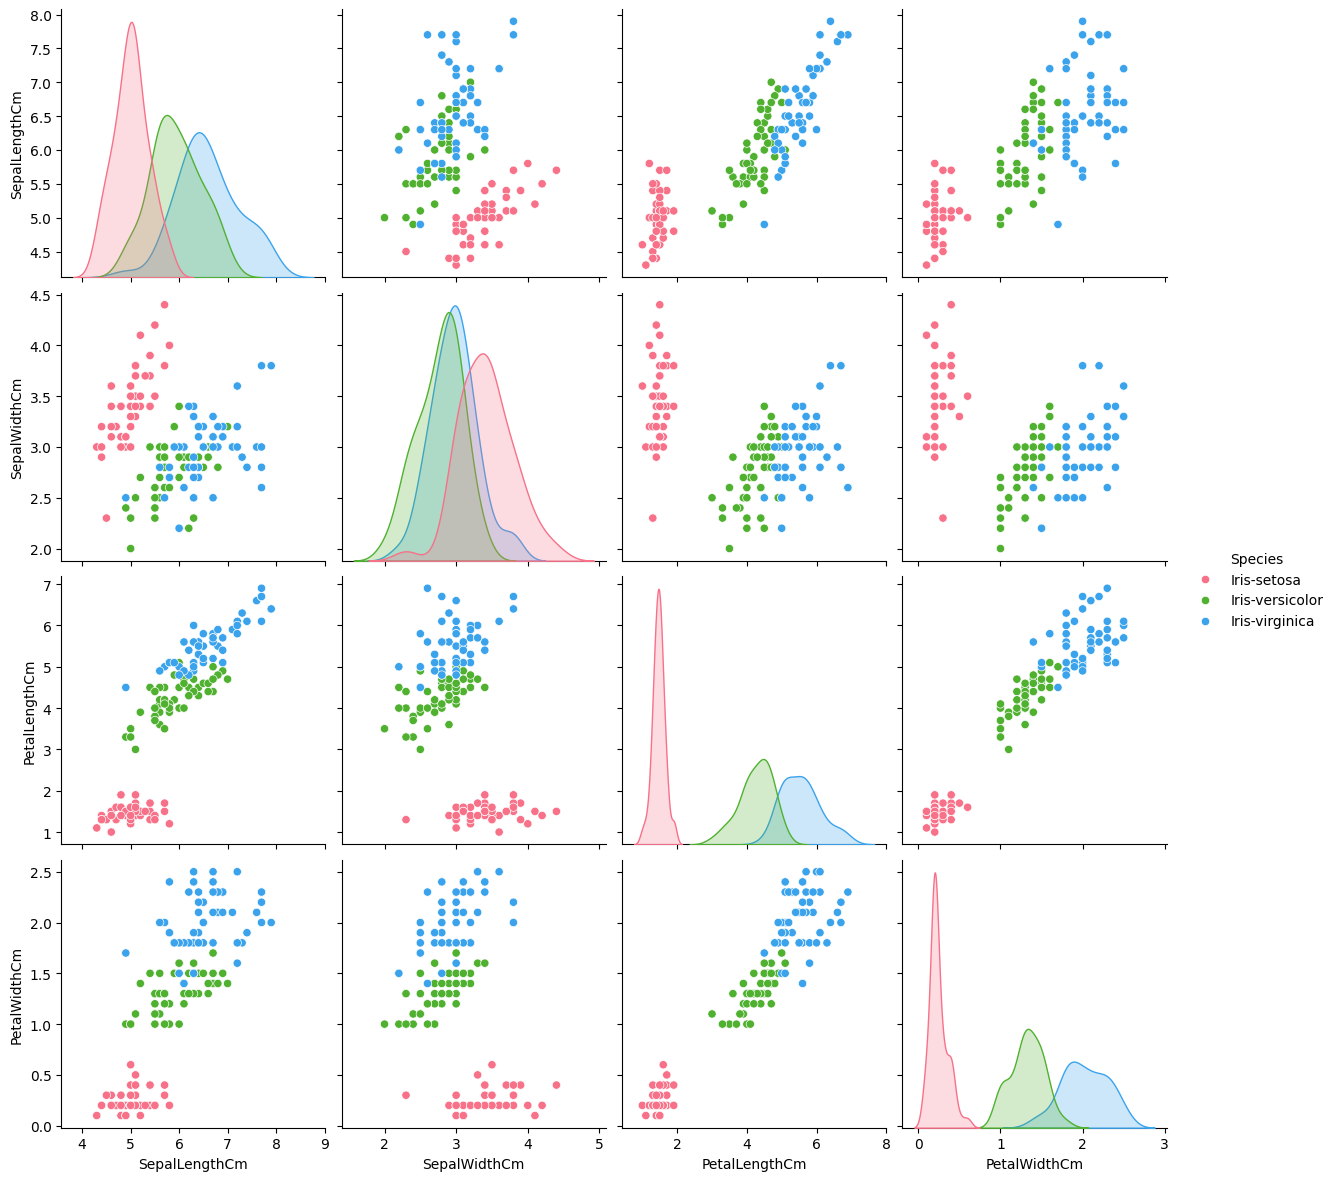

In [17]:
sns.pairplot(df.drop("Id", axis=1), hue ="Species",palette= "husl", height=3) 

8. Using HEATMAP

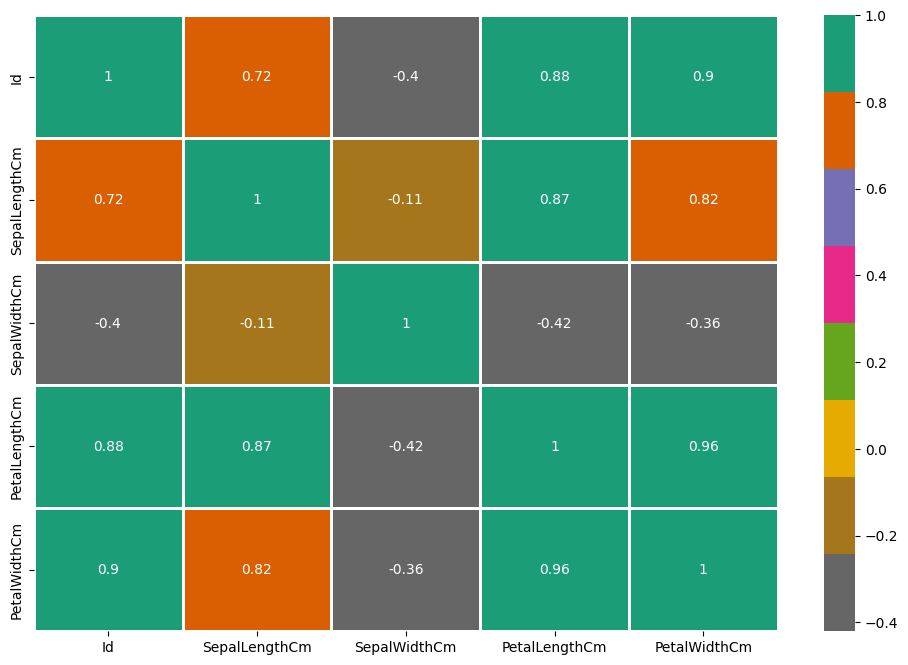

In [18]:
numeric_data = df.select_dtypes(include=[float, int])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()


Text(0.5, 1.0, 'PetalWidthCm Interval and Counts')

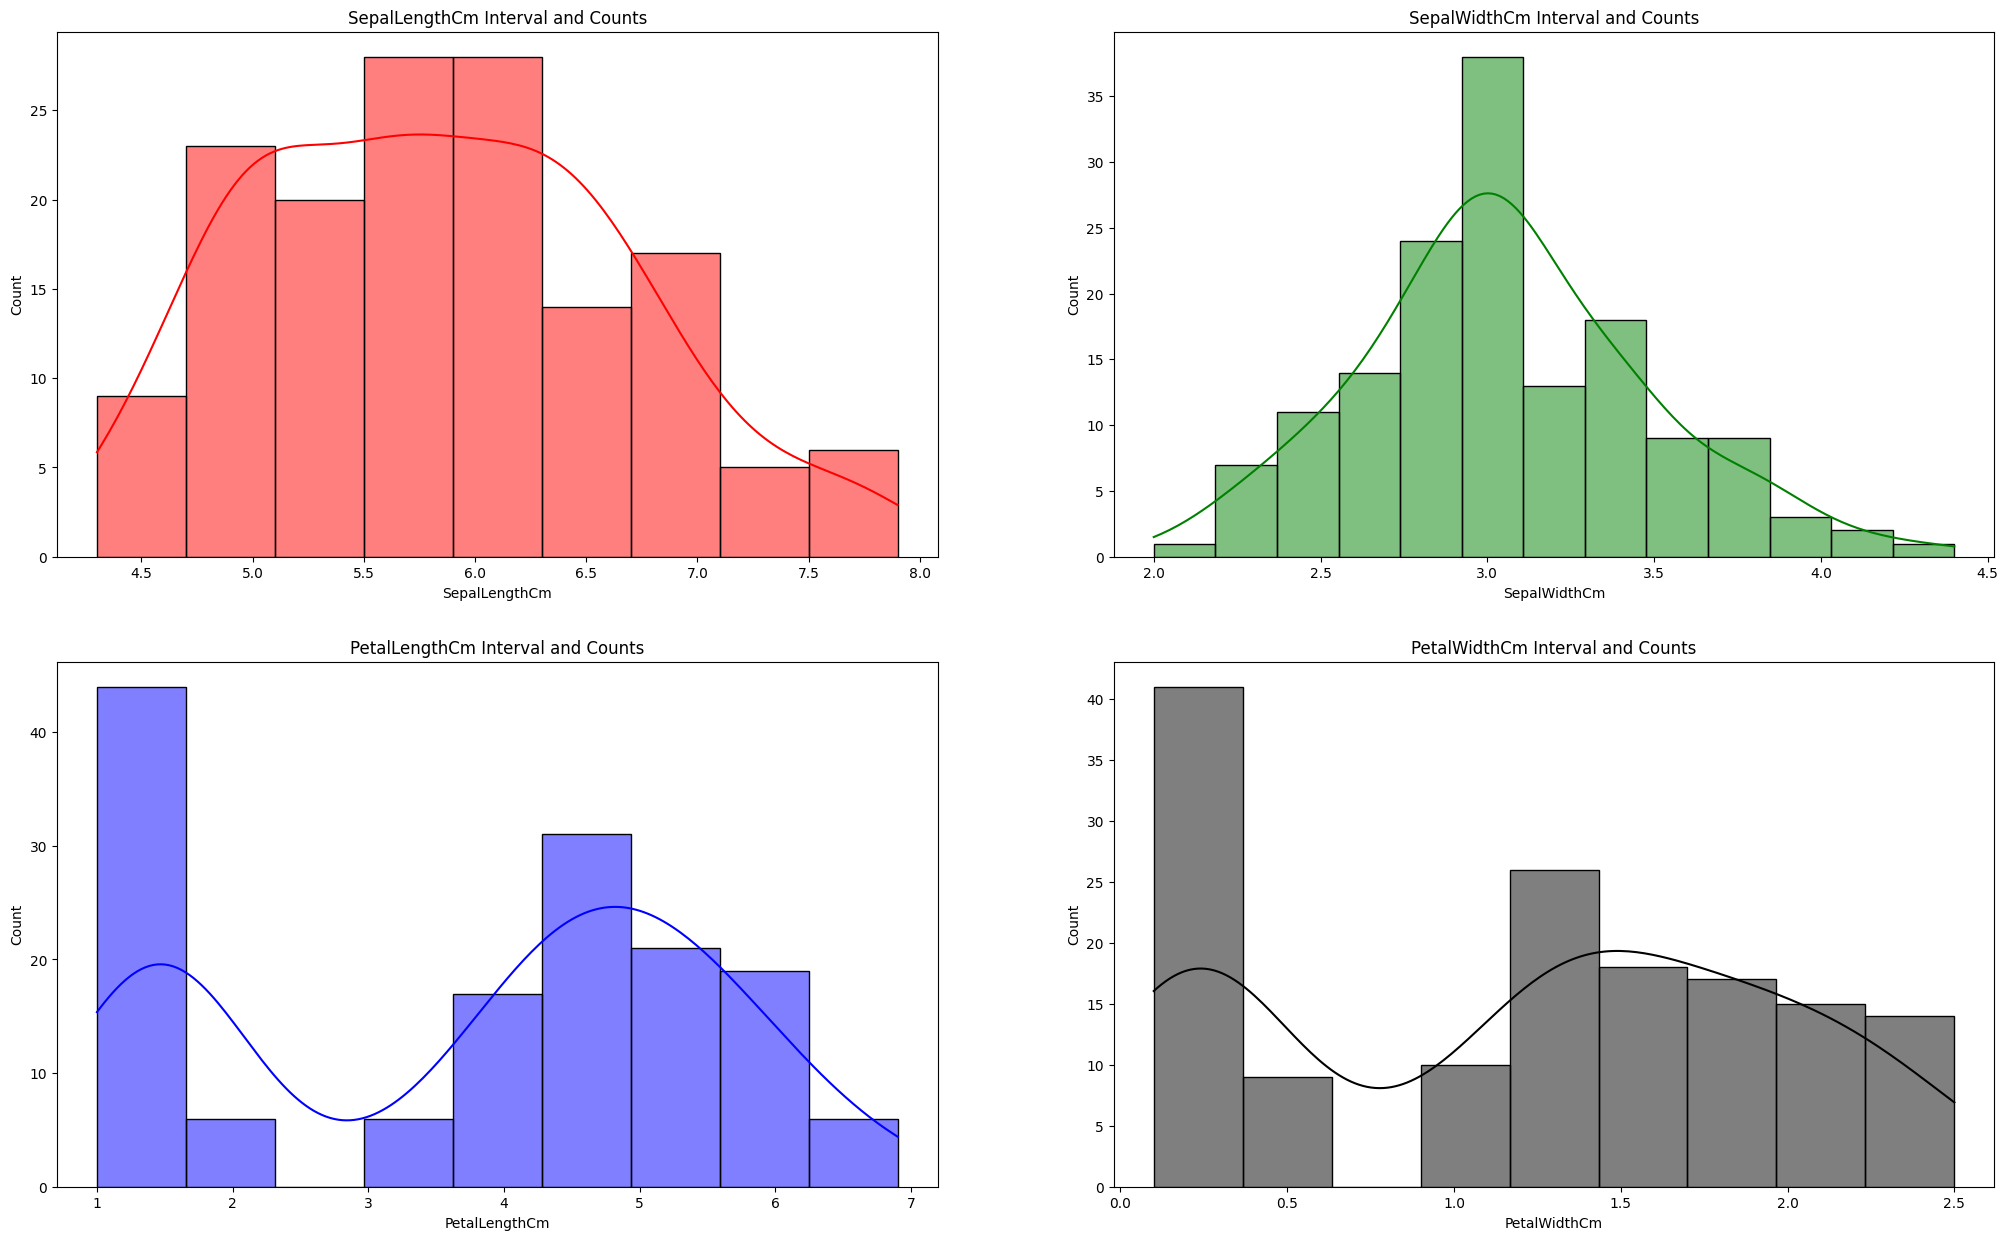

In [19]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(df['SepalLengthCm'], color = 'red', kde = True).set_title('SepalLengthCm Interval and Counts')

plt.subplot(2,2,2)
sns.histplot(df['SepalWidthCm'], color = 'green', kde = True).set_title('SepalWidthCm Interval and Counts')

plt.subplot(2,2,3)
sns.histplot(df['PetalLengthCm'], kde = True, color = 'blue').set_title('PetalLengthCm Interval and Counts')

plt.subplot(2,2,4)
sns.histplot(df['PetalWidthCm'], kde = True, color = 'black').set_title('PetalWidthCm Interval and Counts')

**Data visualization using Bar:**

<Axes: ylabel='PetalWidthCm'>

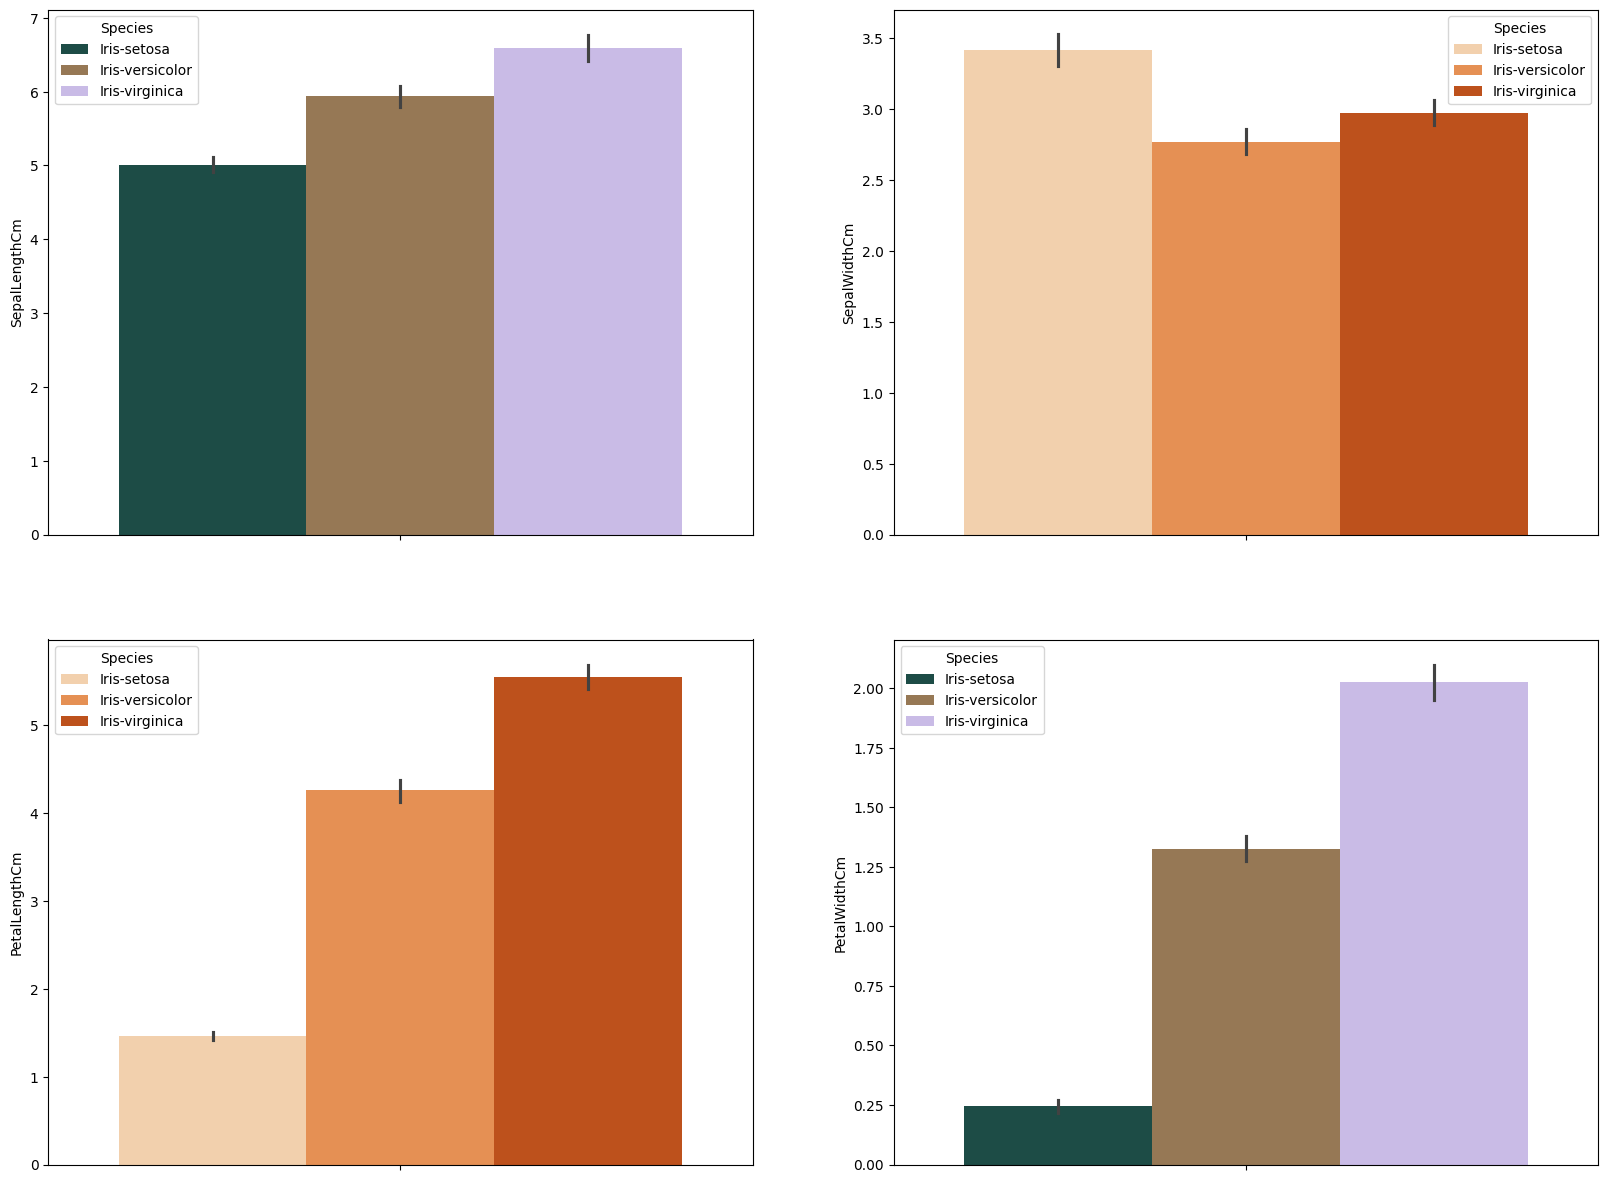

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(hue = 'Species', y = 'SepalLengthCm', data = df, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(hue = 'Species', y = 'SepalWidthCm', data = df, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(hue = 'Species', y = 'PetalLengthCm', data = df, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(hue = 'Species', y = 'PetalWidthCm', data = df, palette="cubehelix")

## Data preparation

### Label encoding the target

Since the algorithms accept only numeric data, we will encode the `Species` column using the `LabelEncoder()` from scikit learn.

In [21]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [22]:
X=df.drop(['Species'], axis=1)
Y=df['Species']

In [23]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


### Splitting the data into training and testing data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

## Modeling

### Using algorithms in sklearn package

Decision Tree Classifier with Cross-validation

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_accuracy = dt_cv_scores.mean()
print("Decision Tree Cross-validation Accuracy:", dt_accuracy)

Decision Tree Cross-validation Accuracy: 0.9916666666666668


k-Nearest Neighbors Classifier with Cross-validation

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
knn_accuracy = knn_cv_scores.mean()
print("kNN Cross-validation Accuracy:", knn_accuracy)

kNN Cross-validation Accuracy: 0.9916666666666668


Naive Bayes Classifier with Cross-validation

In [ ]:
nb_classifier = GaussianNB()
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
nb_accuracy = nb_cv_scores.mean()
print("Naive Bayes Cross-validation Accuracy:", nb_accuracy)

Naive Bayes Cross-validation Accuracy: 0.9916666666666666


### Using custom implemented algorithms

Reading data from the file and transform the target labels to integers

In [ ]:
# Load data
data = np.genfromtxt("iris.csv", delimiter=',', skip_header=1, usecols=(1, 2, 3, 4))
target = np.genfromtxt("iris.csv", delimiter=',', skip_header=1, usecols=(5), dtype=str)

# Transform target labels to integers
target_int = np.zeros(len(target), dtype=int)
classes = np.unique(target)
for i, c in enumerate(classes):
    target_int[target == c] = i

#### Decision Tree

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        if len(set(y)) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'predict': np.argmax(np.bincount(y))}
        else:
            best_split, best_value, best_score, best_sets = self._find_best_split(X, y)

            if best_score == 0:
                return {'predict': np.argmax(np.bincount(y))}

            true_branch = self._grow_tree(*best_sets[0], depth+1)
            false_branch = self._grow_tree(*best_sets[1], depth+1)

            return {'index': best_split, 'value': best_value, 'true_branch': true_branch, 'false_branch': false_branch}

    def _find_best_split(self, X, y):
        best_split = None
        best_value = None
        best_score = 0
        best_sets = None

        for i in range(len(X[0])):
            values = set(X[:, i])
            for val in values:
                true_indices = np.where(X[:, i] <= val)[0]
                false_indices = np.where(X[:, i] > val)[0]
                if len(true_indices) == 0 or len(false_indices) == 0:
                    continue
                true_branch_labels = y[true_indices]
                false_branch_labels = y[false_indices]
                score = self._gini_impurity(true_branch_labels, false_branch_labels)
                if score > best_score:
                    best_split = i
                    best_value = val
                    best_score = score
                    best_sets = [(X[true_indices], true_branch_labels), (X[false_indices], false_branch_labels)]
        return best_split, best_value, best_score, best_sets

    def _gini_impurity(self, true_labels, false_labels):
        p_true = len(true_labels) / (len(true_labels) + len(false_labels))
        p_false = len(false_labels) / (len(true_labels) + len(false_labels))
        return 1 - p_true ** 2 - p_false ** 2

    def predict(self, X):
        predictions = np.zeros(len(X), dtype=int)
        for i, x in enumerate(X):
            predictions[i] = self._predict(x)
        return predictions

    def _predict(self, x, node=None):
        node = self.tree if node is None else node
        if 'predict' in node:
            return node['predict']
        if x[node['index']] <= node['value']:
            return self._predict(x, node['true_branch'])
        else:
            return self._predict(x, node['false_branch'])
        

# Initialize and fit the Decision Tree
tree = DecisionTree(max_depth=3)  # Limiting the maximum depth to 3
tree.fit(data, target_int)

predictions = tree.predict(data)
accuracy = np.mean(predictions == target_int)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.8466666666666667


#### k-Nearest Neighbor

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            predictions.append(max(set(nearest_labels), key=nearest_labels.count))
        return predictions

# Initialize and fit the KNN model
knn = KNN(k=5)
knn.fit(data, target_int)

# Predict and calculate accuracy
predictions_knn = knn.predict(data)
accuracy_knn = np.mean(predictions_knn == target_int)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9666666666666667


#### Naive Bayes

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)

    def _calculate_probability(self, x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * (std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def _get_class_probabilities(self, x):
        probabilities = []
        for c in self.classes:
            class_indices = np.where(self.y_train == c)
            class_data = self.X_train[class_indices]
            means = np.mean(class_data, axis=0)
            stds = np.std(class_data, axis=0)
            class_prob = np.prod(self._calculate_probability(x, means, stds))
            probabilities.append(class_prob)
        return probabilities

    def predict(self, X):
        predictions = []
        for x in X:
            class_probabilities = self._get_class_probabilities(x)
            predicted_class = self.classes[np.argmax(class_probabilities)]
            predictions.append(predicted_class)
        return predictions

# Initialize and fit the Naive Bayes model
naive_bayes = NaiveBayes()
naive_bayes.fit(data, target_int)

# Predict and calculate accuracy
predictions_nb = naive_bayes.predict(data)
accuracy_nb = np.mean(predictions_nb == target_int)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.96
